In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline
plt.rcParams["figure.figsize"] = (30,12)

In [188]:
rain = pd.read_csv('sydney-rain.csv')
rain.rename(columns = {'Monthly Precipitation Total (millimetres)': 'mm'}, inplace=True)

In [189]:
def calc_period(row):
    # return pd.Period(year=row['Year'], month=row['Month'], freq='M')
    return "{year}.{month:0>2}".format(year=row['Year'], month=row['Month'])

In [190]:
rain['date'] = rain.apply(calc_period, axis=1)

In [191]:
d = np.polyfit(rain['Year'], rain['mm'], 1)
f = np.poly1d(d)
rain.insert(7, 'trend', f(rain['Year']))

In [192]:
rain

,Product code,Station number,Year,Month,mm,Quality,date,trend
0,IDCJAC0001,66006,1885,1,87.0,Y,1885.01,97.855300
1,IDCJAC0001,66006,1885,2,29.0,Y,1885.02,97.855300
2,IDCJAC0001,66006,1885,3,52.1,Y,1885.03,97.855300
3,IDCJAC0001,66006,1885,4,36.1,Y,1885.04,97.855300
4,IDCJAC0001,66006,1885,5,4.1,Y,1885.05,97.855300
...,...,...,...,...,...,...,...,...
1612,IDCJAC0001,66006,2021,10,60.8,N,2021.10,106.327154
1613,IDCJAC0001,66006,2021,11,138.7,N,2021.11,106.327154
1614,IDCJAC0001,66006,2021,12,163.3,N,2021.12,106.327154
1615,IDCJAC0001,66006,2022,1,155.8,N,2022.01,106.389447


Text(2022.02, 106.38944693403644, '106.38944693403644')

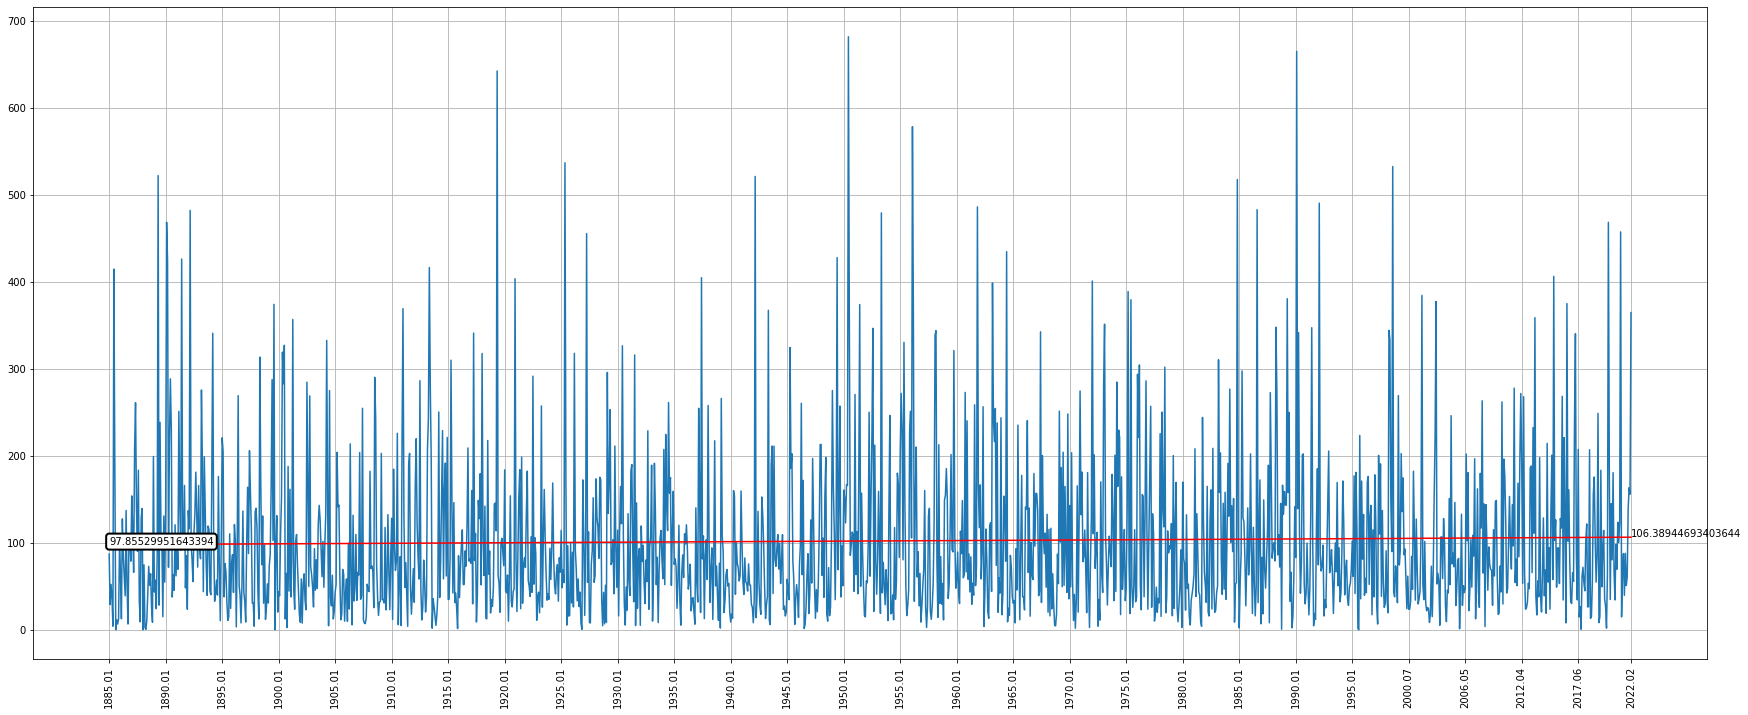

In [224]:
fig, ax = plt.subplots()
p1 = ax.plot(
    rain['date'], rain['mm']
)
p2 = ax.plot(
    rain['date'], rain['trend'], color='Red'
)

# tickes and grid.
x_ticks = rain.iloc[::(5*12), :]['date']
x_ticks_last = rain.iloc[-1:]['date']
ticks = pd.concat([x_ticks, x_ticks_last])
plt.xticks(rotation=90)
ax.set_xticks(ticks)
plt.grid()

# add annotation for trend line.
first_label = f"{rain.iloc[1]['trend']}"
last = rain.iloc[-1]
last_label = f"{last['trend']}"
ax.annotate(first_label, (first['date'], first['trend']), textcoords='data',  bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2))
ax.annotate(last_label, (last['date'], last['trend']), textcoords='data')

# plt.show()

<AxesSubplot:title={'center':'hello'}, xlabel='date', ylabel='mm'>

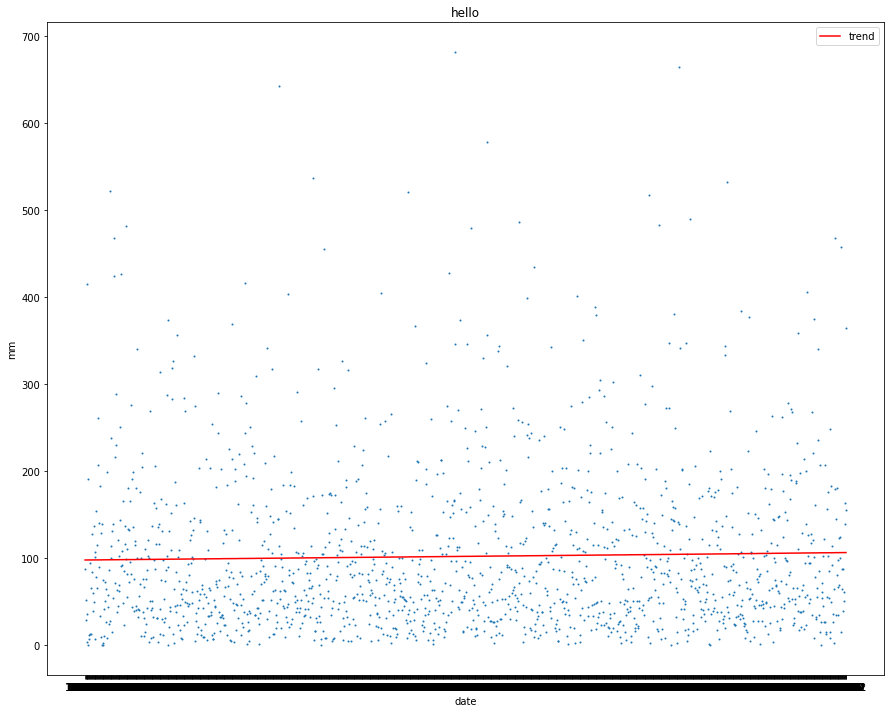

In [153]:
ax = rain.plot.scatter(
    x='date', y='mm',
    title='hello',
    grid=True,
    s=1
)
rain.plot(x='date', y='trend', color='Red', ax=ax)